# Text Preprocessing and Sentiment analysis of r/Happy

Import and read the csv file 

In [1]:
%pip install emoji
%pip install nltk
%pip install spacy
import pandas as pd
import emoji as emoji
import nltk
from nltk.tokenize import RegexpTokenizer
!python -m spacy download en_core_web_sm
import spacy
import en_core_web_sm
from nltk.stem import WordNetLemmatizer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 13.9 MB 12.8 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
happy_final = pd.read_csv("happy_final.csv")

In [13]:
happy_final.head()

,author,title,selftext,full_link,created_utc,score,num_comments,num_crossposts
0,Utterlybored,Two Weeks Since Shot #2 Means I Have Reached P...,"...or as I call it, 2V + 14\n\nOff to hug the ...",https://www.reddit.com/r/happy/comments/mnmzct...,2021-04-09 18:02:50,1,3,0
1,Infinitianss,"I don’t know if it’s humans’ genetic muddle, o...",It's about time we stop feeling gloomy and sta...,https://www.reddit.com/r/happy/comments/mnmtgs...,2021-04-09 17:54:57,1,3,0
2,alicerosemusic,Listen to this music and remember what it is l...,\n\n[https://youtu.be/g9xtRcHvyDI](https://yo...,https://www.reddit.com/r/happy/comments/mnd7gi...,2021-04-09 09:04:32,1,2,0
3,runthereszombies,Got a really nice compliment about my OSCE ass...,Im a medical student in the US. At the end of ...,https://www.reddit.com/r/happy/comments/mnadyl...,2021-04-09 05:27:11,1,2,0
4,cinnabumbum,One of the most joyous parts of my day is hear...,My 3 month old puppy is in the garden right no...,https://www.reddit.com/r/happy/comments/mn3qam...,2021-04-08 22:54:25,1,3,0


We start the sentiment analysis with text preprocessing. 

Store all text in a list

In [9]:
text_all = []
for i in happy_final.loc[:,"selftext"]:
    text_all.append(i)
print('Total posts scraped:', len(text_all))

Total posts scraped: 1628


Then, we preprocess the titles to get rid of the emojis, stopwords, and links 

In [18]:
#Make all selftext content into a string object  
text_list = text_all
text_list = [str(i) for i in text_list] #this makes every title into a string itself but separated by commas 

In [20]:
#removing emojis
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

text_clean = [give_emoji_free_text(i) for i in text_list]

In [21]:
## tokenization

In [35]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+?!!!')
tokenized_string = [tokenizer.tokenize(i) for i in text_clean]
print(tokenized_string[:5])

[['or', 'as', 'I', 'call', 'it', '2V', '14', 'Off', 'to', 'hug', 'the', 'kids', 'and', 'grandkids', 'Time', 'to', 'party', 'with', 'my', 'other', '2V', '14', 'friends', 'THANK', 'YOU', 'SCIENCE'], ['It', 's', 'about', 'time', 'we', 'stop', 'feeling', 'gloomy', 'and', 'start', 'feeling', 'HAPPY', 'https', 'infinitians', 'com', 'start', 'feeling', 'happy', 'https', 'infinitians', 'com', 'start', 'feeling', 'happy'], ['https', 'youtu', 'be', 'g9xtRcHvyDI', 'https', 'youtu', 'be', 'g9xtRcHvyDI', 'Alice', 'Rose', 'Alive', 'folk', 'worldmusic', 'indiepop'], ['Im', 'a', 'medical', 'student', 'in', 'the', 'US', 'At', 'the', 'end', 'of', 'the', 'year', 'every', 'US', 'med', 'student', 'has', 'to', 'complete', 'a', 'several', 'hours', 'long', 'assessment', 'called', 'an', 'OSCE', 'where', 'you', 'conduct', '5', 'or', '6', 'doctors', 'appointments', 'with', 'a', 'variety', 'of', 'people', 'who', 'have', 'a', 'variety', 'of', 'complaints', 'The', 'patients', 'are', 'trained', 'actors', 'Anything',

Some words are uppercase while others are lowercase. We must standardize to all lower case then put it in a list 

In [37]:
lower_case = []
for sent in tokenized_string:
    word_list = []
    for word in sent:
        word_list.append(word.lower())
    lower_case.append(word_list)

print(lower_case[:5])

[['or', 'as', 'i', 'call', 'it', '2v', '14', 'off', 'to', 'hug', 'the', 'kids', 'and', 'grandkids', 'time', 'to', 'party', 'with', 'my', 'other', '2v', '14', 'friends', 'thank', 'you', 'science'], ['it', 's', 'about', 'time', 'we', 'stop', 'feeling', 'gloomy', 'and', 'start', 'feeling', 'happy', 'https', 'infinitians', 'com', 'start', 'feeling', 'happy', 'https', 'infinitians', 'com', 'start', 'feeling', 'happy'], ['https', 'youtu', 'be', 'g9xtrchvydi', 'https', 'youtu', 'be', 'g9xtrchvydi', 'alice', 'rose', 'alive', 'folk', 'worldmusic', 'indiepop'], ['im', 'a', 'medical', 'student', 'in', 'the', 'us', 'at', 'the', 'end', 'of', 'the', 'year', 'every', 'us', 'med', 'student', 'has', 'to', 'complete', 'a', 'several', 'hours', 'long', 'assessment', 'called', 'an', 'osce', 'where', 'you', 'conduct', '5', 'or', '6', 'doctors', 'appointments', 'with', 'a', 'variety', 'of', 'people', 'who', 'have', 'a', 'variety', 'of', 'complaints', 'the', 'patients', 'are', 'trained', 'actors', 'anything',

In [38]:
# Work with sample stopwords
import string
from nltk.corpus import stopwords

stops = stopwords.words('english') # NLTK's short list of English stopwords

for punct in string.punctuation:
    stops.append(punct) # Add punctuation marks to stoplist
numbers = ['0','1','2','3','4','5','6','7','8','9']
for num in numbers:
    stops.append(num)
print("Our stopword list", stops)


Our stopword list ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same

In [40]:
no_stop =[]
for sent in lower_case:
    no_stop_sent =[]
    for word in sent:
        if word not in stops:
            no_stop_sent.append(word)
    no_stop.append(no_stop_sent)
no_stop[:2]
    

[['call',
  '2v',
  '14',
  'hug',
  'kids',
  'grandkids',
  'time',
  'party',
  '2v',
  '14',
  'friends',
  'thank',
  'science'],
 ['time',
  'stop',
  'feeling',
  'gloomy',
  'start',
  'feeling',
  'happy',
  'https',
  'infinitians',
  'com',
  'start',
  'feeling',
  'happy',
  'https',
  'infinitians',
  'com',
  'start',
  'feeling',
  'happy']]

# Setup sentiment dictionaries 
For some reason spacy isn't downloading correctly in my environment, so feel free to keep the original sentiment method you had. However, if you're planning taking text mining with Wilkens, this is [lecture 5](https://github.com/wilkens-teaching/info3350-s22/blob/main/lectures/lec-05-sentiment.ipynb) of his course. I don't use all of this code, but I just copied and pasted from his jupyter notebook.

In [64]:
from collections import defaultdict
import nltk
import os
import random

#nltk.download('opinion_lexicon') # Need to download this the first time used

# NLTK simple lexicon (from Hu and Liu (2004))
nltk_lexicon = {
    'positive' : set(nltk.corpus.opinion_lexicon.positive()), # Why cast to a set?
    'negative' : set(nltk.corpus.opinion_lexicon.negative())
}

# Print a sample of the NLTK lexicon
print('NLTK lexicon sample')
for key in nltk_lexicon.keys():
    print(f'{key}:', random.sample(tuple(nltk_lexicon[key]), 5))
    
# NRC EmoLex lexicon (from Mohammad, http://sentiment.nrc.ca/lexicons-for-research/)
# No package for this, just read the data from a local file
emolex_file = os.path.join('emolex.txt')
nrc_lexicon = defaultdict(dict) # Like Counter(), defaultdict eases dictionary creation
with open(emolex_file, 'r') as f:
    # emolex file format is: word emotion value
    for line in f:
        word, emotion, value = line.strip().split()
        nrc_lexicon[word][emotion] = int(value)
        
# Print a sample of the NRC EmoLex lexicon
print('\nNRC lexicon sample')       
for key in random.sample(tuple(nrc_lexicon.keys()), 2):
    print(f'{key}:', nrc_lexicon[key])

NLTK lexicon sample
positive: ['judicious', 'bliss', 'generous', 'enrichment', 'sociable']
negative: ['smelly', 'crashed', 'fractiously', 'menacingly', 'clash']

NRC lexicon sample
gait: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
centrifugal: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}


# Sentiment Scoring

In [43]:
def word_sentiment_score(word, method='nrc', lex=nrc_lexicon):
    '''
    Takes a word, optional method in ['nrc', 'nltk'], and optional lexicon dictionary.
    Returns 1 (if positive), -1 (if negative), 0 (neutral), or None (not in lex).
    '''
    word = word.lower() # Handle non-case-folded inputs
    if method.lower() == 'nrc':
        if word in lex: # Only score words that are in the lexicon
            pos = lex[word]['positive']
            neg = lex[word]['negative']
            if pos == neg: # Ties (mostly 0==0) return zero
                return 0
            elif pos > neg:
                return 1
            else:
                return -1
    elif method.lower() == 'nltk':
        if word in lex['positive']:
            return 1
        elif word in lex['negative']:
            return -1
    else:
        raise NameError("Method not in ['nrc', 'nltk']")
    return 0

In [45]:
def average(lst):
    return sum(lst) / len(lst)

sentiment_scores = []
for sent in no_stop:
    word_list =[]
    for word in sent:
        word_list.append(word_sentiment_score(word))
    if (len(word_list) != 0):
        avg = average(word_list)
        sentiment_scores.append(avg)
    else:
        sentiment_scores.append(0)
len(sentiment_scores)
        

1628

In [91]:
df = pd.DataFrame(list(zip(sentiment_scores, happy_final['created_utc'] )),
               columns =['sentiment_score', 'date'])
df.sort_values('date', inplace = True)

# convert to date
df['date'] = pd.to_datetime(df['date'])

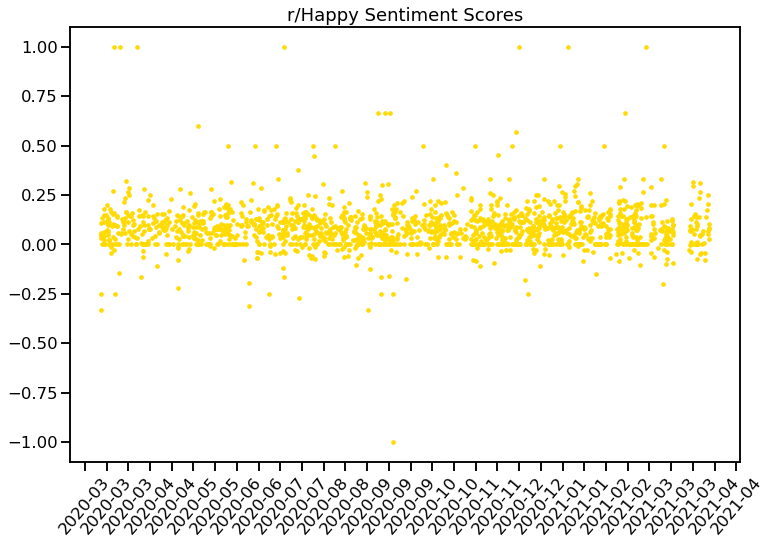

In [129]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df['date'], df['sentiment_score'], s =10, c = 'xkcd:sunflower yellow')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation = 50)
plt.title("r/Happy Sentiment Scores")

plt.show()

In [ ]:
# df = pd.DataFrame(cleaned, columns=["word"])
# df.to_csv('cleaned_happy_data.csv', index=False)

Now that we have a cleaned output, we are going to use the VADER model (Valence Aware Dictionary for Sentiment Reasoning) to calculate the polarity score (valence) of each word